<a href="https://colab.research.google.com/github/smilesrgouveia/Aula/blob/main/TarefaTrilha1_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import urllib.request  

texto = []

for line in urllib.request.urlopen('https://gutenberg.org/cache/epub/12540/pg12540.txt'): 
    texto.append(line.decode('utf-8'))

# Limpa texto
for i in range(len(texto)):
    texto[i] = texto[i].lower() 
    texto[i] = texto[i].replace('\n','')
    texto[i] = texto[i].replace('.','')
    texto[i] = texto[i].replace(',','')
    texto[i] = texto[i].replace('(','')
    texto[i] = texto[i].replace(')','')
    texto[i] = texto[i].replace('?','')
    #texto[i] = texto[i].replace('\','')
    texto[i] = texto[i].replace('!','') 
    texto[i] = texto[i].replace('_','')  
    texto[i] = texto[i].replace('+','') 
    texto[i] = texto[i].replace('*','')

In [65]:
dicionario = {}                            

for linha in texto:
  
  linha = linha.lower()                 
  palavras = linha.split()                

  for palavra in palavras:                     
    if palavra not in dicionario.keys():          
      dicionario[palavra] = 1                   
    else:                                
      dicionario[palavra] =  dicionario[palavra] + 1   


print(list(dicionario.items())[:100])  

[('\ufeffthe', 1), ('project', 85), ('gutenberg', 23), ('ebook', 13), ('of', 2853), ('george', 104), ('washington', 438), ('by', 399), ('william', 28), ('roscoe', 4), ('thayer', 4), ('this', 279), ('is', 273), ('for', 503), ('the', 4530), ('use', 18), ('anyone', 5), ('anywhere', 3), ('at', 371), ('no', 173), ('cost', 6), ('and', 2056), ('with', 513), ('almost', 43), ('restrictions', 3), ('whatsoever', 3), ('you', 156), ('may', 94), ('copy', 14), ('it', 558), ('give', 31), ('away', 11), ('or', 296), ('re-use', 2), ('under', 71), ('terms', 34), ('license', 17), ('included', 3), ('online', 6), ('wwwgutenbergorg', 3), ('title:', 1), ('author:', 1), ('release', 3), ('date:', 1), ('june', 12), ('6', 5), ('2004', 1), ('[ebook', 1), ('#12540]', 1), ('language:', 1), ('english', 35), ('start', 6), ('produced', 10), ('distributed', 8), ('proofreading', 2), ('team', 2), ('riverside', 1), ('library', 2), ('1922', 2), ('to', 2153), ('harriet', 1), ('sears', 1), ('amory', 1), ('best', 30), ('wishes'

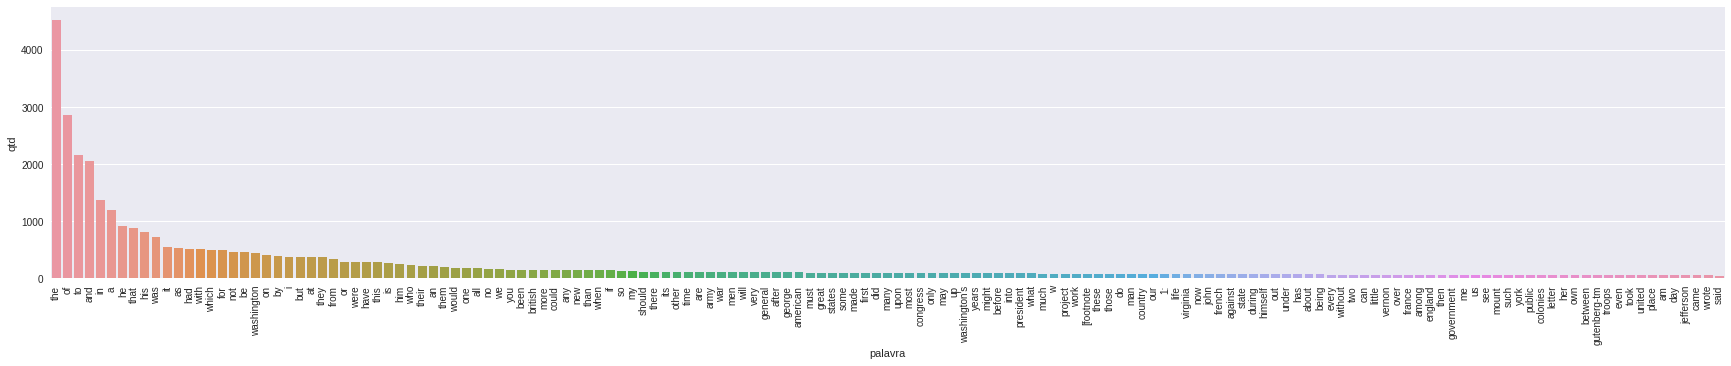

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(dicionario.items(),  columns=['palavra', 'qtd']).sort_values('qtd',ascending=False)
df = df[df['qtd'] >50] # somente termos com mais de 10 ocorrências
#df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(30,5))
mpl.style.use(['seaborn'])
sns.barplot(x=df.palavra,y=df['qtd'])
plt.xticks(rotation=90) 

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


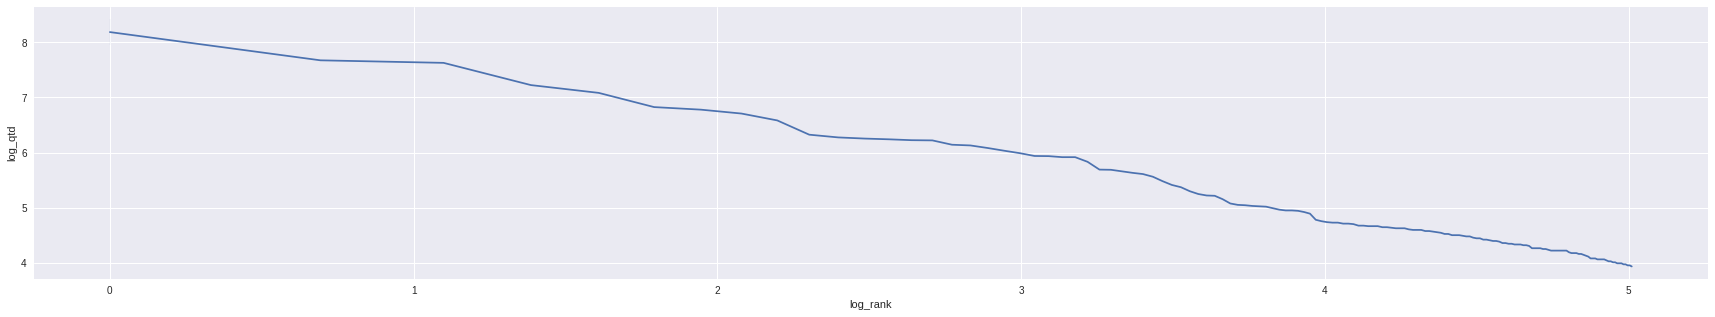

In [74]:
df = df.sort_values('qtd',ascending=False).reset_index(drop=True)

df['qtd'].replace(-np.Inf,0)

df['log_qtd'] = np.log(df['qtd'])
df['log_rank'] = np.log(df.index)
df['log_rank'].replace(-np.Inf,0,inplace=True)


plt.figure(figsize=(30,5))
sns.lineplot(x=df['log_rank'],y=df['log_qtd'])

plt.show()